<a href="https://colab.research.google.com/github/JacopoKahl/cancer-python-lab/blob/master/Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cancer classification task

Import libraries and functions for the script

In [63]:
import pandas as pd #pd will be the shorthand for pandas

from keras.models import Sequential #Import the sequential model for Neural Networks
from keras.layers import Dense #Import the Dense type of layer

import matplotlib.pyplot as plt #import mat plotting library for charts and pictures

import random #import the random function
random.seed(0) #Set seed to the random function so that every call to random will produce the same sequence of "pseudo-random" numbers

print (random.randint(0,10)) #the function produces the same number each time the cell is running

6


**Load Dataset**

In [0]:
X_train = pd.read_csv("xtrain.csv", header=None) #Load input data (no labels are available for columns)
Y_train = pd.read_csv("ytrain.csv", header=None) #Load input data (no labels are available for rows)

X_test = pd.read_csv("xtest.csv", header=None) #Load input data (no labels are available for columns)
Y_test = pd.read_csv("ytest.csv", header=None) #Load input data (no labels are available for rows)

Let's inspect the data

In [65]:
X_train.head() #head() show the first 5 rows of the dataframe

X_train.shape  #returns the shape (dimensions) of the dataframe (in this case the input data)

(455, 30)

**Create NN classifier model**

In [0]:
classifier = Sequential() #our classifier is an instance of the Sequential class

classifier.add(Dense(units = 16, activation= 'relu', input_dim= 30)) #add the first (left most) of the net
classifier.add(Dense(units = 8, activation= 'relu'))  #layer with 8 neurons and relu activation
classifier.add(Dense(units = 6, activation= 'relu'))  #layer with 6 neurons and relu activation
classifier.add(Dense(units = 1, activation= 'sigmoid'))  #output layer with 1 neuron and sigmoid activation

In [67]:
classifier.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 16)                496       
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_23 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 7         
Total params: 693
Trainable params: 693
Non-trainable params: 0
_________________________________________________________________


**Compilation of the model**

After the network structure, the optimezer and the loss function need to be defined through the compile function.

In [0]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**Training phase**

The model is trained on the dataset that is (i-th sample, i-th output label) couples.

Training logs are saved into a History object

**Note:**
epochs: n times the entire datase is revisited
batch_size: number of samples to be evaluated in the cost function in order to perform a step (example a steo of gradient descent)

In [69]:
 hist = classifier.fit(X_train, Y_train, batch_size=8, epochs=30)

Epoch 1/30
455/455 [==============================] - 1s 1ms/step - loss: 0.5916 - acc: 0.6967
Epoch 2/30
455/455 [==============================] - 0s 476us/step - loss: 0.4959 - acc: 0.9121
Epoch 3/30
455/455 [==============================] - 0s 469us/step - loss: 0.4323 - acc: 0.9385
Epoch 4/30
455/455 [==============================] - 0s 443us/step - loss: 0.3766 - acc: 0.9670
Epoch 5/30
455/455 [==============================] - 0s 552us/step - loss: 0.3283 - acc: 0.9758
Epoch 6/30
455/455 [==============================] - 0s 491us/step - loss: 0.2840 - acc: 0.9802
Epoch 7/30
455/455 [==============================] - 0s 409us/step - loss: 0.2259 - acc: 0.9824
Epoch 8/30
455/455 [==============================] - 0s 440us/step - loss: 0.1342 - acc: 0.9758
Epoch 9/30
455/455 [==============================] - 0s 589us/step - loss: 0.0833 - acc: 0.9824
Epoch 10/30
455/455 [==============================] - 0s 509us/step - loss: 0.0664 - acc: 0.9868
Epoch 11/30
455/455 [==========

Let's evaluate the network by computing predictions on the test set (X_test)

In [0]:
Y_pred= classifier.predict(X_test)

In [0]:
Y_pred = [1 if y>=0.5 else 0 for y in Y_pred]

In [0]:
#Y_pred

In [73]:
total=0
correct=0
wrong=0

print ('Dimension of Test input set:', len(X_test))
print ('Dimension of Test output set:', len(Y_pred))
#len(Y_pred)

#for i in range (10):
 # print(i)

for i in range(len(Y_pred)):
  total=total+1
  if (Y_test.at[i,0] == Y_pred[i]):
    correct=correct+1
  else:
    wrong=wrong+1

print('Total: ', total)
print('Correct: ', correct)
print('Wrong: ', wrong)

Dimension of Test input set: 114
Dimension of Test output set: 114
Total:  114
Correct:  110
Wrong:  4


Plot training History
**bold text**



Text(0.5, 0, 'epochs')

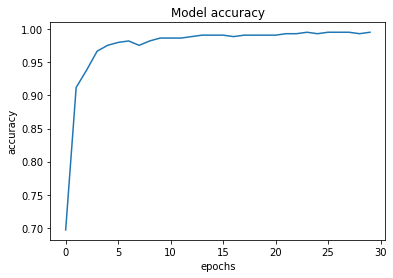

In [74]:
plt.plot(hist.history['acc']) #plot accuracy data 
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')